## Libraries

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sarsa_agent import Agent_Sarsa

## Run


Run:  29  | Sarsa Agent |  iht_size:  4096  | num_tilings:  8  | num_tiles:  8 

Episode 100/100 | steps: 190 | Epsilon: 0.00592 | Alpha : 0.00001

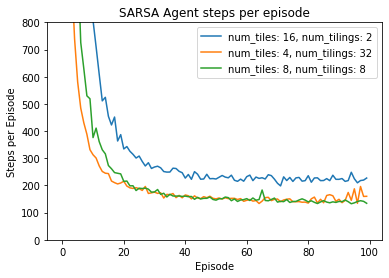

In [2]:
discount = 0.99
trial, max_time = [100,10000]
num_runs = 30

gym.envs.register(
    id='MountainCarVersion-v1',
    entry_point='gym.envs.classic_control:MountainCarEnv',
    max_episode_steps=max_time, # MountainCar-v0 uses 200
    reward_threshold=-1,     
)
env = gym.make('MountainCarVersion-v1')
env.reset()

steps_total = []

for r in range(num_runs):
    
    steps_per_episode = []
    iht_size, num_tilings, num_tiles = [4096, 2, 16]
    clear_output(wait=True)
    print('\nRun: ' , r, ' | Sarsa Agent | ','iht_size: ' ,iht_size, ' | num_tilings: ', num_tilings,' | num_tiles: ' ,num_tiles, '\n')
    alpha, epsilon = [0.5, 1.0]
    decay = [True, True]
    agent_sarsa = Agent_Sarsa(0, env, discount, alpha,epsilon, decay, iht_size, num_tilings, num_tiles)
    steps_per_episode.append(agent_sarsa.run(trial, max_time))

    iht_size, num_tilings, num_tiles = [4096, 32, 4]
    clear_output(wait=True)
    print('\nRun: ' , r, ' | Sarsa Agent | ','iht_size: ' ,iht_size, ' | num_tilings: ', num_tilings,' | num_tiles: ' ,num_tiles, '\n')
    alpha, epsilon = [5e-3, 1.0]
    decay = [True, True]
    agent_sarsa = Agent_Sarsa(1, env, discount, alpha,epsilon, decay, iht_size, num_tilings, num_tiles)
    steps_per_episode.append(agent_sarsa.run(trial, max_time))

    iht_size, num_tilings, num_tiles = [4096, 8, 8]
    clear_output(wait=True)
    print('\nRun: ' , r, ' | Sarsa Agent | ','iht_size: ' ,iht_size, ' | num_tilings: ', num_tilings,' | num_tiles: ' ,num_tiles, '\n')
    alpha, epsilon = [0.09, 1.0]
    decay = [True, True]
    agent_sarsa = Agent_Sarsa(2, env, discount, alpha,epsilon, decay, iht_size, num_tilings, num_tiles)
    steps_per_episode.append(agent_sarsa.run(trial, max_time))
    steps_total.append(steps_per_episode)

plt.plot(np.mean(steps_total,axis=0)[0], label="num_tiles: 16, num_tilings: 2")
plt.plot(np.mean(steps_total,axis=0)[1], label="num_tiles: 4, num_tilings: 32")
plt.plot(np.mean(steps_total,axis=0)[2], label="num_tiles: 8, num_tilings: 8")
plt.legend()
plt.title("SARSA Agent steps per episode")
plt.ylabel('Steps per Episode')
plt.xlabel('Episode')
plt.ylim(0, 800)
plt.show()